Created dummy data directories and image files for a runnable example.
Dataset loaded successfully.

--- Task 3: Dataset Class Information ---
Class to index mapping:
{'class_a': 0, 'class_b': 1}

Class names (based on folder names):
['class_a', 'class_b']

--- Task 4: Batch Information ---
Shape of image batch: torch.Size([2, 3, 64, 64])
Shape of label batch: torch.Size([2])

--- Task 5: Displaying Images in the Batch ---


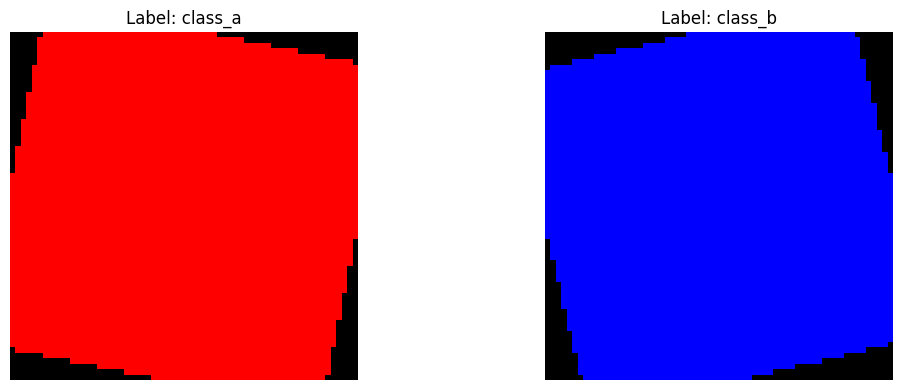

In [8]:
import torch
import os
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

custom_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.RandomRotation(45),
    transforms.ToTensor()
])

data_dir = './data'

# Ensure the directories and dummy files exist every time the script is run
if not os.path.exists(os.path.join(data_dir, 'class_a', 'dummy_a.png')):
    os.makedirs(os.path.join(data_dir, 'class_a'), exist_ok=True)
    try:
        dummy_img_a = Image.new('RGB', (64, 64), color = 'red')
        dummy_img_a.save(os.path.join(data_dir, 'class_a', 'dummy_a.png'))
    except ImportError:
        print("Pillow library not found. Please install it with 'pip install Pillow' to create dummy images.")
if not os.path.exists(os.path.join(data_dir, 'class_b', 'dummy_b.png')):
    os.makedirs(os.path.join(data_dir, 'class_b'), exist_ok=True)
    try:
        dummy_img_b = Image.new('RGB', (64, 64), color = 'blue')
        dummy_img_b.save(os.path.join(data_dir, 'class_b', 'dummy_b.png'))
    except ImportError:
        print("Pillow library not found. Please install it with 'pip install Pillow' to create dummy images.")
print("Created dummy data directories and image files for a runnable example.")

try:
    imagefolder_dataset = datasets.ImageFolder(root=data_dir, transform=custom_transform)
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Please ensure your data directory and file structure are correct.")

if 'imagefolder_dataset' in locals():
    print("\n--- Task 3: Dataset Class Information ---")
    print("Class to index mapping:")
    print(imagefolder_dataset.class_to_idx)
    print("\nClass names (based on folder names):")
    print(imagefolder_dataset.classes)

if 'imagefolder_dataset' in locals():
    imagefolder_loader = torch.utils.data.DataLoader(imagefolder_dataset, batch_size=4, shuffle=True)
    images, labels = next(iter(imagefolder_loader))
    print("\n--- Task 4: Batch Information ---")
    print(f"Shape of image batch: {images.shape}")
    print(f"Shape of label batch: {labels.shape}")

    print("\n--- Task 5: Displaying Images in the Batch ---")

    images = images.numpy().transpose((0, 2, 3, 1))

    fig, axes = plt.subplots(1, len(images), figsize=(12, 4))
    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        ax.set_title(f"Label: {imagefolder_dataset.classes[labels[i]]}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()
